Introduction
In this assignment, you will perform a comprehensive analysis of
hospital patient data using three CSV files: drug_code.csv,
diagnostic_code.csv, and patient_data.csv. The goal of this analysis is
to gain insights into patient demographics, drug prescriptions,
diagnoses, and mortality rates. You will answer a series of questions
and enhance the assignment with more visualizations.
Dataset Description
drug_code.csv: Contains information about different drug codes,
including their descriptions and severity levels.
diagnostic_code.csv: Contains diagnostic codes (ICD-9 codes)
along with their descriptions and severity levels.
patient_data.csv: Contains patient information, including subject
IDs, genders, ages, drug prescriptions, and diagnostic codes.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
drug_codes = pd.read_csv("drug_code.csv")
diagnostic_codes = pd.read_csv("diagnostic_code.csv")
patient_data = pd.read_csv("patient_data.csv")

In [3]:
#Merge the patient_data with drug_codes and diagnostic_codes datasets:
patient_data = pd.merge(patient_data, drug_codes[['subject_id', 'drg_severity']], on='subject_id', how='left')
patient_data = pd.merge(patient_data, diagnostic_codes[['subject_id', 'icd9_code']], on='subject_id', how='left')


In [4]:
#Question 1: Identifying High-Risk Patients:
high_risk_patients = patient_data[
    (patient_data["drg_severity"] == "High") & (patient_data["expire_flag"] == 1)
]
high_risk_patient_info = high_risk_patients[["subject_id", "gender"]]
print("High-Risk Patients:")
print(high_risk_patient_info)


High-Risk Patients:
     subject_id gender
104          32      M
105          32      M
106          32      M
107          32      M
114          47      M
275           8      F
276           8      F
277           8      F
278           8      F
283           8      F
284           8      F
285           8      F
286           8      F


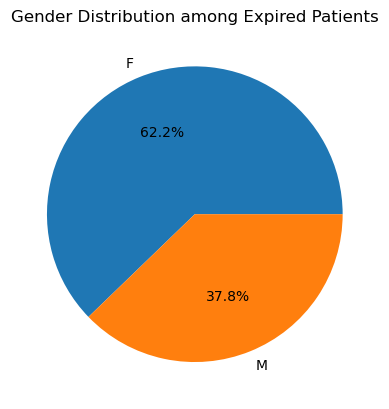

In [5]:
#Question 2: Gender Distribution among Expired Patients:
expired_gender_distribution = patient_data[patient_data["expire_flag"] == 1]["gender"].value_counts()
plt.pie(expired_gender_distribution, labels=expired_gender_distribution.index, autopct='%1.1f%%')
plt.title("Gender Distribution among Expired Patients")
plt.show()


In [6]:
#Question 3: Common Diagnoses for High-Risk Patients:
common_diagnoses = high_risk_patients["icd9_code"].value_counts().head(3)
print("Top 3 Common Diagnoses for High-Risk Patients:")
print(common_diagnoses)


Top 3 Common Diagnoses for High-Risk Patients:
D58    2
D56    2
D49    2
Name: icd9_code, dtype: int64


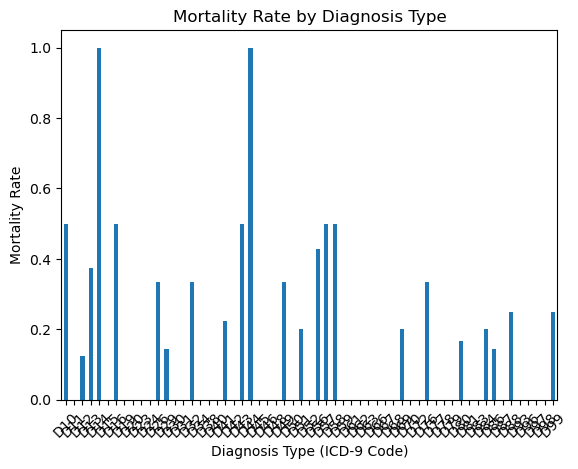

In [7]:
#Question 4: Mortality Rate by Diagnosis Type:
diagnosis_mortality_rates = patient_data.groupby("icd9_code")["expire_flag"].mean()
diagnosis_mortality_rates.plot(kind="bar")
plt.xlabel("Diagnosis Type (ICD-9 Code)")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate by Diagnosis Type")
plt.xticks(rotation=45)
plt.show()


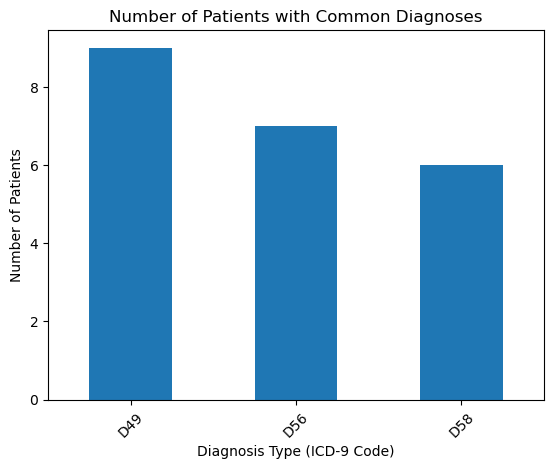

In [10]:
# Question 5: Age of Patients with Common Diagnoses
high_risk_patients = patient_data[
    (patient_data["drg_severity"] == "High") & (patient_data["expire_flag"] == 1)
]
common_diagnoses = high_risk_patients["icd9_code"].value_counts().head(3).index
common_diagnoses_age = patient_data[patient_data["icd9_code"].isin(common_diagnoses)].groupby("icd9_code")["subject_id"].count()
common_diagnoses_age.plot(kind="bar")
plt.xlabel("Diagnosis Type (ICD-9 Code)")
plt.ylabel("Number of Patients")
plt.title("Number of Patients with Common Diagnoses")
plt.xticks(rotation=45)
plt.show()

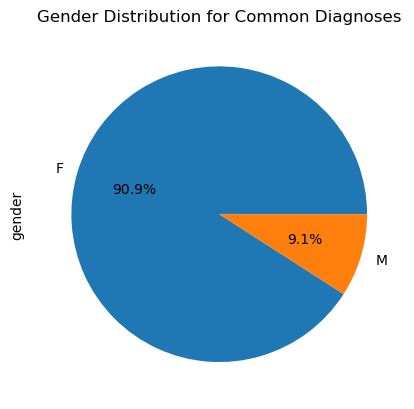

In [11]:
# Question 6: Gender Distribution for Common Diagnoses
common_diagnoses_gender_distribution = patient_data[patient_data["icd9_code"].isin(common_diagnoses)]["gender"].value_counts()
common_diagnoses_gender_distribution.plot(kind="pie", autopct='%1.1f%%')
plt.title("Gender Distribution for Common Diagnoses")
plt.show()

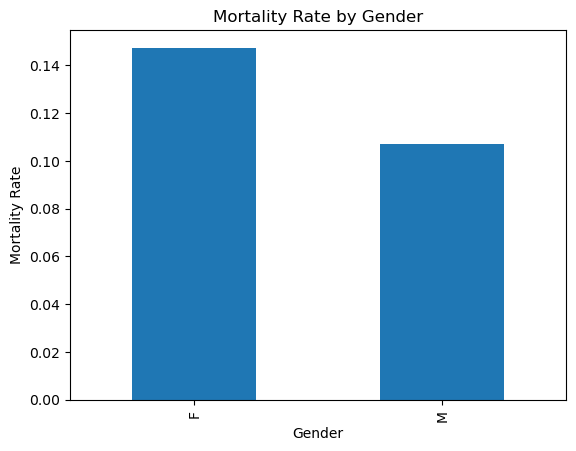

In [12]:
# Question 7: Mortality Rate by Gender
gender_mortality_rates = patient_data.groupby("gender")["expire_flag"].mean()
gender_mortality_rates.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate by Gender")
plt.show()